# Data

In [1]:
import numpy as np
#from scipy.stats import chi2_contingency
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# My library
import mzlib as mz


In [2]:
URLname = ""
Filename = ""


In [3]:
#import requests
#r = requests.get(url=URLname)
#data = r.json()


In [4]:
df = pd.read_csv(Filename)
print("df.shape = ", df.shape)
df.head(20)


/Users/mycomputer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


df.shape =  (8726014, 19)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0
5,1106226590,2015-09-15T00:00:00,19.0,NaN,NaN,CA,201507.0,NaN,NaN,VN,GY,SAN PEDRO S/O BOYD,1A35W,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
6,1106500452,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201605.0,NaN,MAZD,PA,BL,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,99999.0,99999.0
7,1106500463,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201602.0,NaN,NaN,PA,BK,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,99999.0,99999.0
8,1106506402,2015-12-22T00:00:00,945.0,NaN,NaN,CA,201605.0,NaN,NaN,PA,BR,721 S WESTLAKE,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.0
9,1106506413,2015-12-22T00:00:00,1100.0,NaN,NaN,CA,201701.0,NaN,NaN,PA,SI,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.0


# Number of top Makes

In [5]:
Ntop = 25

# Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8726014 entries, 0 to 8726013
Data columns (total 19 columns):
Ticket number            object
Issue Date               object
Issue time               float64
Meter Id                 object
Marked Time              float64
RP State Plate           object
Plate Expiry Date        float64
VIN                      object
Make                     object
Body Style               object
Color                    object
Location                 object
Route                    object
Agency                   float64
Violation code           object
Violation Description    object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtypes: float64(7), object(12)
memory usage: 1.2+ GB


In [7]:
cols = df.columns.tolist()

for c in cols:
    print(c, " -- ", len(list(df[c].unique()) ) )
    

Ticket number  --  8726014
Issue Date  --  1844
Issue time  --  1441
Meter Id  --  37824
Marked Time  --  1220
RP State Plate  --  79
Plate Expiry Date  --  874
VIN  --  7746
Make  --  1478
Body Style  --  192
Color  --  107
Location  --  1506076
Route  --  8480
Agency  --  45
Violation code  --  297
Violation Description  --  796
Fine amount  --  40
Latitude  --  981329
Longitude  --  1034915


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Issue time,8723431.0,1.203930e+03,4.722413e+02,0.0,9.120000e+02,1.156000e+03,1511.0,2.359000e+03
Marked Time,290599.0,1.055399e+03,2.275962e+02,1.0,9.100000e+02,1.035000e+03,1200.0,2.400000e+03
Plate Expiry Date,7931187.0,1.867823e+05,5.276278e+04,1.0,2.016010e+05,2.017020e+05,201803.0,8.201080e+05
Agency,8725469.0,5.200932e+01,9.301675e+00,1.0,5.100000e+01,5.400000e+01,55.0,9.700000e+01
Fine amount,8719507.0,7.011293e+01,3.211512e+01,10.0,6.300000e+01,6.800000e+01,73.0,5.050000e+02
Latitude,8726011.0,5.501648e+06,3.004177e+06,99999.0,6.421512e+06,6.451540e+06,6475012.6,4.042322e+09
Longitude,8726011.0,1.586792e+06,2.065458e+06,99999.0,1.821558e+06,1.841987e+06,1858206.9,4.042322e+09


# Derived features -------------------------------

## Make 

In [9]:
# Want Ntop unique 'Make' values
# note missing values aren't in top Ntop list
x = df['Make'].value_counts()  #sorting is automatic with value_counts
list_Make_ALL = list(x.index)
list_Make = list_Make_ALL[:Ntop]
print("There are {} unique Makes".format(len(list_Make_ALL)))
print("Only take top Ntop values")
list_Make


There are 1477 unique Makes
Only take top Ntop values


['TOYT',
 'HOND',
 'FORD',
 'NISS',
 'CHEV',
 'BMW',
 'MERZ',
 'VOLK',
 'HYUN',
 'DODG',
 'LEXS',
 'KIA',
 'JEEP',
 'AUDI',
 'MAZD',
 'OTHR',
 'GMC',
 'CHRY',
 'INFI',
 'ACUR',
 'SUBA',
 'VOLV',
 'TOYO',
 'MITS',
 'CADI']

### Predictor variable

In [10]:
# If the 'Make' is in the Ntop list 'list_Make', then enter '1' in the new column 'Y', otherwise enter '0'.
# The 'Y' column will be the training label
df['Y'] = df['Make'].apply(lambda x: '1' if x in list_Make else '0' )


In [11]:
df.head(10)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Y
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,0
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2,0
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,1
5,1106226590,2015-09-15T00:00:00,19.0,NaN,NaN,CA,201507.0,NaN,NaN,VN,GY,SAN PEDRO S/O BOYD,1A35W,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,0
6,1106500452,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201605.0,NaN,MAZD,PA,BL,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,99999.0,99999.0,1
7,1106500463,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201602.0,NaN,NaN,PA,BK,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,99999.0,99999.0,0
8,1106506402,2015-12-22T00:00:00,945.0,NaN,NaN,CA,201605.0,NaN,NaN,PA,BR,721 S WESTLAKE,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.0,0
9,1106506413,2015-12-22T00:00:00,1100.0,NaN,NaN,CA,201701.0,NaN,NaN,PA,SI,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8726014 entries, 0 to 8726013
Data columns (total 20 columns):
Ticket number            object
Issue Date               object
Issue time               float64
Meter Id                 object
Marked Time              float64
RP State Plate           object
Plate Expiry Date        float64
VIN                      object
Make                     object
Body Style               object
Color                    object
Location                 object
Route                    object
Agency                   float64
Violation code           object
Violation Description    object
Fine amount              float64
Latitude                 float64
Longitude                float64
Y                        object
dtypes: float64(7), object(13)
memory usage: 1.3+ GB


## Temp view

In [13]:
# Create an equal number of records for Y=0 and Y=1 from Make != null subset.
df_temp = mz.get_balanced_set(df)

# NB: changes made in df will not be reflected in df_temp


# Agency ---------------------

In [14]:
#df_temp['Agency'].value_counts()
df['Agency'].value_counts()


54.0    2150548
51.0    1943578
56.0    1846731
53.0    1571032
55.0     876274
1.0      189383
2.0       51700
57.0      37202
4.0       26652
58.0       9596
36.0       8028
40.0       5644
3.0        4965
11.0       3285
34.0        381
41.0        171
97.0         87
5.0          61
50.0         30
59.0         30
6.0          19
12.0         13
60.0         11
77.0          7
52.0          6
9.0           5
7.0           4
15.0          4
24.0          3
35.0          3
45.0          2
8.0           2
16.0          1
30.0          1
13.0          1
42.0          1
32.0          1
10.0          1
43.0          1
71.0          1
70.0          1
68.0          1
61.0          1
38.0          1
Name: Agency, dtype: int64

In [15]:
df['Agency'].unique()


array([ 1.,  2., 54., 36., 34., 11., 13., 51., 53., 55., 57., 56., 40.,
        4., nan,  3., 58., 97., 52., 41., 77., 59., 43.,  6., 24.,  5.,
       50., 12., 60., 16., 68.,  9., 45., 42., 35., 38.,  7., 15., 10.,
       61., 71.,  8., 70., 32., 30.])

In [16]:
df['Agency'].isna().sum()

545

In [17]:
# Retain entries in top N of Agency values; put the rest in an "other" category.
df['Agency'].fillna(-1.0,inplace=True)
df['Agency'] = df['Agency'].astype(int)
df['Agency'] = df['Agency'].astype(str)

df['Agency'].unique()

#df['Agency_new'] = df['Agency'].apply(lambda x: x if x in list_Agency else 'other' )


array(['1', '2', '54', '36', '34', '11', '13', '51', '53', '55', '57',
       '56', '40', '4', '-1', '3', '58', '97', '52', '41', '77', '59',
       '43', '6', '24', '5', '50', '12', '60', '16', '68', '9', '45',
       '42', '35', '38', '7', '15', '10', '61', '71', '8', '70', '32',
       '30'], dtype=object)

### Get most common Agency values from an even split (Ntop or not-Ntop)

In [18]:
df_temp['Y'].value_counts()


0    371330
1    371330
Name: Y, dtype: int64

In [19]:
# Note: not much difference between top entries of 'Agency', whether using df or df_temp.  Still, use df_temp.

#df_temp['Agency'].value_counts()
#df['Agency'].value_counts()


In [20]:
#list_Agency_ = df['Agency'].value_counts().index.tolist()
#list_Agency_ = list_Agency_[:10]
#list_Agency_


In [21]:
list_Agency = df_temp['Agency'].value_counts().index.tolist()
list_Agency = list_Agency[:10]

print(list_Agency)
list_Agency = [int(c) for c in list_Agency]
print(list_Agency)
list_Agency = [str(c) for c in list_Agency]
print(list_Agency)


[54.0, 56.0, 51.0, 53.0, 55.0, 1.0, 2.0, 57.0, 4.0, 3.0]
[54, 56, 51, 53, 55, 1, 2, 57, 4, 3]
['54', '56', '51', '53', '55', '1', '2', '57', '4', '3']


In [22]:
df['Agency_new'] = df['Agency'].apply(lambda x: x if x in list_Agency else 'other' )


In [23]:
#df[ ["Agency","Agency_new"] ].head(100)


In [24]:
df['Agency_new'].value_counts()


54       2150548
51       1943578
56       1846731
53       1571032
55        876274
1         189383
2          51700
57         37202
other      27949
4          26652
3           4965
Name: Agency_new, dtype: int64

# Color ----------------------------------------------------

In [25]:
# If I could get the meaning of these codes, I could group some together.
# Maybe look at their nearness in an HSB or RGB color plot.  Then look at distance/groupings (w/ k-means).
df['Color'].unique()


array(['GY', 'WH', 'BK', 'BL', 'BR', 'SI', 'GO', nan, 'RE', 'MA', 'TA',
       'BU', 'GR', 'YE', 'OR', 'WT', 'RD', 'SL', 'BN', 'OT', 'GN', 'MR',
       'BG', 'PR', 'TN', 'UN', 'PK', 'TU', 'CO', 'BE', 'RU', 'PU', 'PL',
       'CR', 'SN', 'PE', 'BZ', 'PI', 'ME', 'CH', 'TE', 'LI', 'MU', 'KH',
       'GA', 'AQ', 'WI', 'OL', 'SA', 'KA', 'RS', 'CL', 'TP', 'PW', 'SU',
       'CP', 'UT', 'SH', 'OG', 'UK', 'VI', 'BW', 'RV', 'YL', 'TW', 'GD',
       'DA', 'W', 'BC', 'TL', 'MY', 'EF', 'WE', 'AU', 'WR', 'WA', 'AM',
       'GL', 'RA', 'BI', 'BA', 'ES', 'LA', 'PP', 'GE', 'VA', 'LE', 'CA',
       'SV', 'BH', 'AP', 'VO', 'VU', 'SM', 'TR', 'O', 'R', 'IN', 'MN',
       'IV', 'MP', 'AD', 'MD', 'SO', 'CU', 'MC', 'MI'], dtype=object)

In [26]:
# This is a relatively small number, so just absorb it into "other" category, to be defined below.
df['Color'].isna().sum()


4115

In [27]:
df['Color'] = df['Color'].astype(str)  #just being sure...


In [28]:
#df['Color'].value_counts()
df_temp['Color'].value_counts()


BK    158804
WT    158494
GY    122191
SL     76335
BL     57783
RD     39250
BN     33208
GN     23761
WH     11814
GO      9739
MR      8886
BG      6426
TN      5970
SI      5411
OT      5089
YE      4458
OR      3139
RE      2979
GR      1940
PR      1450
TA      1428
BR       834
UN       698
MA       408
CO       398
TU       366
BE       289
BU       270
PK       184
CR        96
PU        90
CH        21
BZ        20
PI        17
RU        14
TE        10
YL         5
MU         5
GL         4
PE         4
PL         3
RV         3
BI         2
CL         2
W          2
WI         2
GD         2
TL         1
LA         1
SA         1
PP         1
DA         1
MI         1
CU         1
TP         1
BA         1
ME         1
GA         1
VU         1
VA         1
Name: Color, dtype: int64

In [29]:
list_Color = df_temp['Color'].value_counts().index.tolist()
list_Color = list_Color[:15]
list_Color


['BK',
 'WT',
 'GY',
 'SL',
 'BL',
 'RD',
 'BN',
 'GN',
 'WH',
 'GO',
 'MR',
 'BG',
 'TN',
 'SI',
 'OT']

In [30]:
df['Color_new'] = df['Color'].apply(lambda x: x if x in list_Color else 'other' )


In [31]:
df['Color_new'].value_counts()


BK       1879909
WT       1809932
GY       1691850
SL       1092754
BL        678777
RD        432673
GN        250291
BN        172073
other     168691
GO        114601
MR        104882
WH         99770
TN         64126
SI         55489
OT         55224
BG         54972
Name: Color_new, dtype: int64

# RP State Plate --------------------------

In [32]:
df['RP State Plate'].unique()


array(['CA', 'FL', 'NY', 'OR', 'WA', 'NJ', 'CO', 'AR', 'MA', 'TX', 'AZ',
       'IN', 'MO', 'OK', 'NV', 'ND', 'OH', 'KS', 'NC', 'TN', 'PA', 'IL',
       'MN', 'UT', 'VT', 'WY', 'CT', 'MI', 'GA', 'MX', 'AB', 'IA', 'MD',
       'SC', 'DE', 'ID', 'NM', 'LA', 'MS', 'ME', 'SD', 'WI', 'NE', 'MT',
       'AL', 'SA', 'ON', 'VA', 'KY', 'HI', 'XX', 'BC', 'NH', 'QU', 'DC',
       'VI', 'US', 'AK', 'WV', 'CZ', 'RI', 'NB', 'CN', 'FN', 'DD', nan,
       'MB', 'PE', 'NS', 'PR', 'TT', 'AS', 'YU', 'GU', 'NF', 'NW', '|',
       'ML', 'VN'], dtype=object)

In [33]:
df['RP State Plate'] = df['RP State Plate'].astype(str)  #just being sure...


In [34]:
df['RP State Plate'].value_counts()
    

CA     8127986
AZ       77649
TX       55337
NV       51944
FL       37924
WA       34585
IL       24995
OR       24291
CO       22167
NY       16261
PA       12777
UT       12447
MI       12231
OH       11966
NJ       11648
GA       11624
IN       11270
TN       11222
VA       10463
MA        9405
MO        9029
MD        8904
OK        8751
NC        8590
MN        8411
NM        8306
MX        7402
LA        6445
WI        5869
CT        5200
        ...   
DC        1261
AK        1156
SD        1133
DE         971
ND         923
VT         814
nan        765
QU         750
WV         698
DD         478
US         397
FN         361
NB         170
CN         165
MB         152
SA         151
XX         127
NS          66
CZ          37
VI          34
GU          26
PR          19
PE          19
NW          18
TT          18
AS          16
NF          13
YU           8
|            2
ML           1
Name: RP State Plate, Length: 79, dtype: int64

In [35]:
# An unusual bump on CA.  Finally occurred to me this is California data.  Other plates are out-of-state.


# Violation code --------------------------

In [36]:
df['Violation code'].unique()

array(['4000A1', '8939', '000', '8069A', '8070', '8069AA', '8058L',
       '8069AP', '8069B', '5200A', '099', '8056E4', '8813B', '225078A',
       '8603', '8069BS', '6344K2', '018', '5204A', '80714', '002', '8940',
       '007', '030', '89391C', '225078C2', '8936', '013', '098', '010',
       '8061', '011', '5204A-', '22502A', '80.70', '80.69AP+', '22511.57',
       '22507.8A', '80.73.2', '5200', '80.69AA+', '22500E', '22514',
       '80.61', '80.69.2', '80.56E4+', '80.58L', '88.13B+', '80.56E1',
       '88.03A', '22500I-', '22500H', '88.63B+', '80.69B', '80.69BS',
       '80.56E2', '80.69C', '21211B', '22500F', '80.71.4', '80.69A+',
       '86.06', '80.54H1', '80.71.3', '80.49+', '80.56E3', '22502E',
       '22500A', '80.66.1D', '22507.8C', '22500C', '86.03', '80.58.1',
       '22500B', '88.64A', '22500.1+', '88.53', '80.69.1A', '22500L-',
       '022', '80692', '014', '80732', '024', '225001', '569', '8073',
       '8056E2', '8056E1', '22522-', '22507.8B', '22500J', '80.69.4',
      

In [37]:
df['Violation code'] = df['Violation code'].astype(str)  #just being sure...

In [38]:
#df['Violation code2'] = df['Violation code'].str.replace('[^\w\s]','')


In [39]:
df['Violation code'].isna().sum()

0

In [40]:
df['Violation code'].value_counts()


80.69BS     2439494
88.13B+     1524589
80.56E4+     606361
80.58L       599200
5204A-       535798
80.69B       370800
80.69C       290968
5200         239502
80.56E1      188972
80.69AP+     157259
80.61        122059
22500E       108706
80.69A+       96424
80.70         93373
8069BS        90800
80.56E2       90164
80.69AA+      89075
4000A1        86887
22500F        79413
22502A        76341
80.73.2       74313
22514         68155
22500H        57562
88.03A        53880
88.63B+       45558
8056E4        39810
80.69.2       37957
5204A         26110
8069B         19304
8813B         17986
             ...   
22510             2
572521A           2
22511             2
005               1
8025B             1
1564280           1
8049#             1
80725             1
8935              1
6344B16           1
27465B            1
80362             1
027               1
80713**           1
047               1
576               1
1564230           1
8813B#            1
039               1


In [41]:
list_Code = df_temp['Violation code'].value_counts().index.tolist()
list_Code = list_Code[:15]
list_Code


['80.69BS',
 '88.13B+',
 '80.56E4+',
 '80.58L',
 '5204A-',
 '80.69B',
 '5200',
 '80.69C',
 '80.56E1',
 '80.69AP+',
 '80.69A+',
 '80.61',
 '4000A1',
 '8069BS',
 '22500H']

In [42]:
df['Code_new'] = df['Violation code'].apply(lambda x: x if x in list_Code else 'other' )


In [43]:
df['Code_new'].value_counts()


80.69BS     2439494
88.13B+     1524589
other       1319339
80.56E4+     606361
80.58L       599200
5204A-       535798
80.69B       370800
80.69C       290968
5200         239502
80.56E1      188972
80.69AP+     157259
80.61        122059
80.69A+       96424
8069BS        90800
4000A1        86887
22500H        57562
Name: Code_new, dtype: int64

# Latitude ---------------------

In [44]:
df_temp['Latitude'].describe()

# NB: only use the uncorrupted data to get the stats on 'Latitude'


count    7.426600e+05
mean     5.455163e+06
std      2.315179e+06
min      9.999900e+04
25%      6.420784e+06
50%      6.451249e+06
75%      6.475984e+06
max      6.650798e+06
Name: Latitude, dtype: float64

In [45]:
# Only 1 missing values
df['Latitude'].isna().sum()


3

In [46]:
# Obtain stats 
x = df_temp['Latitude'].describe().to_dict()

cut25_Lat = x['25%']
cut50_Lat = x['50%']
cut75_Lat = x['75%']
#sd_Lat    = x['std']


In [47]:
# do imputation.  Could also use KNN, for example
df['Latitude'].fillna(cut50_Lat,inplace=True)


In [48]:
# Too many values to plot/histogram
#binsize = 0.3 * sd_Lat  #use a portion of the SD, to get finer resolution
bin_Lat = 0.3 * np.abs(cut50_Lat - cut25_Lat)  #use a portion of the SD, to get finer resolution

#int( (Latitude - mean_Lat)/bin_Lat )

# Do this to keep it as a real number, but lose a lot of the finer detail.
# Important: use cut50_Lat, and not mean_Lat
df['Lat_new'] = df['Latitude'].apply(lambda x: (x - cut50_Lat)/bin_Lat )


In [49]:
# Note the big spike of dummy values
df['Lat_new'].describe()


count    8.726014e+06
mean    -1.038990e+02
std      3.286972e+02
min     -6.949119e+02
25%     -3.253663e+00
50%      3.187132e-02
75%      2.600042e+00
max      4.415784e+05
Name: Lat_new, dtype: float64

In [50]:
# now clean up high/low values (mostly low)
min_Lat = -8
max_Lat =  8
df['Lat_new'] = df['Lat_new'].apply(lambda x: min_Lat if x < min_Lat else x)
df['Lat_new'] = df['Lat_new'].apply(lambda x: max_Lat if x > max_Lat else x)


In [51]:
df['Lat_new'].describe()

count    8.726014e+06
mean    -7.969315e-01
std      4.116880e+00
min     -8.000000e+00
25%     -3.253663e+00
50%      3.187132e-02
75%      2.600042e+00
max      8.000000e+00
Name: Lat_new, dtype: float64

In [52]:
# Very little difference in distribution of Lat_new, as dependent on Y.  Probably a bad predictor.
# Should see if the "out of range" values were distinctly 0 or 1, although doesn't appear to be the case.
df_temp = mz.get_balanced_set(df)
df_subset = df_temp.sample(n=10000)
df_subset.boxplot( column='Lat_new', by='Y')
#df_good.boxplot( column='Lat_new', by='Y')

# Variance is smaller for Y=1 because there are more instances

# TO DO: check for correlation on outlier sets


# Longitude ---------------------

In [53]:
df_temp['Longitude'].describe()


count    7.426600e+05
mean     1.573487e+06
std      6.359678e+05
min      9.999900e+04
25%      1.820029e+06
50%      1.840853e+06
75%      1.856696e+06
max      2.078654e+06
Name: Longitude, dtype: float64

# Fine amount ---------------------------

In [54]:
# Current slice where Make is uncorrupted
df_good = df.loc[ ~df['Make'].isnull() ]


In [55]:
x = df_temp['Fine amount'].describe()
x

count    741684.000000
mean         70.440210
std          33.158882
min          10.000000
25%          63.000000
50%          68.000000
75%          73.000000
max         363.000000
Name: Fine amount, dtype: float64

In [56]:
cut25_Fine = x['25%']
cut50_Fine = x['50%']
cut75_Fine = x['75%']
#sd_fine    = x['std']


In [57]:
# Missing values
df['Fine amount'].isnull().sum()


6507

In [58]:
# Missing values
df_temp['Fine amount'].isnull().sum()


976

In [59]:
# do imputation.  Could also use KNN, for example
df['Fine amount'].fillna(cut50_Fine,inplace=True)


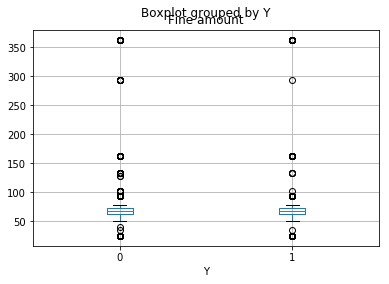

In [60]:
df_temp = mz.get_balanced_set(df)
df_subset = df_temp.sample(n=10000)
df_subset.boxplot( column='Fine amount', by='Y')

# too similar


# MODELING =====================================

## Baseline prediction (over entire training set)

In [61]:
# How many of the entries correspond to a top-Ntop Make?

# The *uncorrupted* rows with 
#df_ = df.loc[ ~df['Make'].isnull() & (df['Y']=='1') ]
#num = df_.shape[0]
num = df.loc[ ~df['Make'].isnull() & (df['Y']=='1') ].shape[0]

# total number of *uncorrupted* rows
#df_ = df.loc[ ~df['Make'].isnull() ]
#den = df_.shape[0]
den = df.loc[ ~df['Make'].isnull() ].shape[0]

print("Percent in top-Ntop (training set) = ", (100.0 * num)/den )
# NB: this means baseline prediction is 91% True that it's in top-Ntop


Percent in top-Ntop (training set) =  91.47845667192345


## Train/Test split

In [62]:
# This set is balances 50/50 for Y=0 and Y=1
df_model = mz.get_balanced_set(df)
df_model.shape


(742660, 24)

In [63]:
# 80% for training set
df_model_train = df_model.sample(frac=0.8, random_state=1235)
df_model_train.shape


(594128, 24)

In [64]:
# 20% for testing
df_model_test = df_model.drop( df_model_train.index )
df_model_test.shape


(148532, 24)

# Modeling Phase

## Correlation of predictors with target (Y) ... this is just a preview

### Agency

In [65]:
mz.get_chi2_stat(df_model_train, 'Agency_new', 'Y')


Y               0      1
Agency_new              
1           11027   6008
2            3248   1588
3             920     86
4             799    917
51          65461  66649
53          46174  54197
54          64426  73748
55          28360  29846
56          74293  62009
57           1080   1232
other        1169    891
- - - - - - - - - - - - - - -
Chi-squared statistic =  5221.423682183289
p-value =  0.0
No. dof =  10
expected frequency (null hyp.) =  [[ 8514.43206683  8520.56793317]
 [ 2417.12905636  2418.87094364]
 [  502.81882355   503.18117645]
 [  857.69095548   858.30904452]
 [66031.2075344  66078.7924656 ]
 [50167.42359727 50203.57640273]
 [69062.11543304 69111.88456696]
 [29092.5173397  29113.4826603 ]
 [68126.45257251 68175.54742749]
 [ 1155.58361834  1156.41638166]
 [ 1029.6290025   1030.3709975 ]]
- - - - - - - - - - - - - - -


### Color

In [66]:
mz.get_chi2_stat(df_model_train, 'Color_new', 'Y')


Y              0      1
Color_new              
BG          3424   1751
BK         63290  64021
BL         23131  23028
BN         22312   4390
GN         10597   8475
GO          3921   3971
GY         38218  59414
MR          3490   3592
OT          2114   1845
RD         16766  14528
SI          2488   1872
SL         22408  38720
TN          2571   2180
WH          6368   3082
WT         65475  61192
other      10384   5110
- - - - - - - - - - - - - - -
Chi-squared statistic =  25146.81106555537
p-value =  0.0
No. dof =  15
expected frequency (null hyp.) =  [[ 2586.56800386  2588.43199614]
 [63632.57181449 63678.42818551]
 [23071.18695466 23087.81304534]
 [13346.19108004 13355.80891996]
 [ 9532.56521154  9539.43478846]
 [ 3944.57868338  3947.42131662]
 [48798.41687986 48833.58312014]
 [ 3539.72456104  3542.27543896]
 [ 1978.78700044  1980.21299956]
 [15641.36407979 15652.63592021]
 [ 2179.214782    2180.785218  ]
 [30552.99109956 30575.00890044]
 [ 2374.64436451  2376.35563549]
 [ 

### Violation code

In [67]:
mz.get_chi2_stat(df_model_train, 'Code_new', 'Y')


Y             0      1
Code_new              
22500H     4800   1658
4000A1     5207   2753
5200      12578   7658
5204A-    17484  18227
80.56E1    5619   6471
80.56E4+  29800  19977
80.58L    15506  20709
80.61      3813   4254
80.69A+    4771   3145
80.69AP+   5989   5399
80.69B    12350  12611
80.69BS   62581  85037
80.69C     7216  10150
8069BS     4401   2908
88.13B+   48402  52459
other     56440  43755
- - - - - - - - - - - - - - -
Chi-squared statistic =  12620.113868649192
p-value =  0.0
No. dof =  15
expected frequency (null hyp.) =  [[ 3227.83694086  3230.16305914]
 [ 3978.56643686  3981.43356314]
 [10114.35557994 10121.64442006]
 [17849.06859633 17861.93140367]
 [ 6042.82264091  6047.17735909]
 [24879.5353678  24897.4646322 ]
 [18100.97782801 18114.02217199]
 [ 4032.0471666   4034.9528334 ]
 [ 3956.57436108  3959.42563892]
 [ 5691.94906821  5696.05093179]
 [12476.00462695 12484.99537305]
 [73782.41460763 73835.58539237]
 [ 8679.87245509  8686.12754491]
 [ 3653.18367927  36

## Classifier (random forest)

In [68]:
# Predictors & response
X_train = ['Agency_new', 'Color_new', 'Code_new']
Y_train = ['Y']


In [69]:
# Predictors and response
dfX = pd.get_dummies(df_model_train[X_train])
dfY = df_model_train[Y_train].values.ravel()


In [70]:
#dfX.head()
columnsX = dfX.columns.tolist()
columnsX


['Agency_new_1',
 'Agency_new_2',
 'Agency_new_3',
 'Agency_new_4',
 'Agency_new_51',
 'Agency_new_53',
 'Agency_new_54',
 'Agency_new_55',
 'Agency_new_56',
 'Agency_new_57',
 'Agency_new_other',
 'Color_new_BG',
 'Color_new_BK',
 'Color_new_BL',
 'Color_new_BN',
 'Color_new_GN',
 'Color_new_GO',
 'Color_new_GY',
 'Color_new_MR',
 'Color_new_OT',
 'Color_new_RD',
 'Color_new_SI',
 'Color_new_SL',
 'Color_new_TN',
 'Color_new_WH',
 'Color_new_WT',
 'Color_new_other',
 'Code_new_22500H',
 'Code_new_4000A1',
 'Code_new_5200',
 'Code_new_5204A-',
 'Code_new_80.56E1',
 'Code_new_80.56E4+',
 'Code_new_80.58L',
 'Code_new_80.61',
 'Code_new_80.69A+',
 'Code_new_80.69AP+',
 'Code_new_80.69B',
 'Code_new_80.69BS',
 'Code_new_80.69C',
 'Code_new_8069BS',
 'Code_new_88.13B+',
 'Code_new_other']

In [71]:
# Create RF model
rf = RandomForestClassifier( n_estimators=100, oob_score=True, random_state=12345, verbose=2 )
rf.fit( dfX, dfY )


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=12345, verbose=2,
            warm_start=False)

In [72]:
# The OOB score gives a quick estimate of test score
rf.oob_score_


0.6027808822341314

### Compare to test set

In [73]:
X_train = ['Agency_new', 'Color_new', 'Code_new']
df_TEST = pd.get_dummies(df_model_test[X_train])
df_TEST_Y = df_model_test[ ['Y'] ]

# predicted values for Y
predicted_TEST = rf.predict( df_TEST )


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


In [74]:
# predicted values for Y
predicted_TEST

array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

In [75]:
# known values for Y
df_TEST_Y['Y'].values

array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

In [76]:
# Fraction correctly predicted based on TEST set
(predicted_TEST == df_TEST_Y['Y'].values).sum() / (len(predicted_TEST)*1.0)

0.6040718498370722

In [77]:
# very close to prediction from OOB

## Individual predictions (expected usage of model) ---------------------

### Examples where Y=0

In [78]:
df_ = df.loc[ ~df['Make'].isnull() & (df['Y']=='0')].sample(10)
df_[['Make','Agency','Color','Violation code', 'Agency_new','Color_new','Code_new']].head(20)


,Make,Agency,Color,Violation code,Agency_new,Color_new,Code_new
1369930,SAA,53,BK,80.69BS,53,BK,80.69BS
7426196,FIAT,51,WT,88.13B+,51,WT,88.13B+
7576149,MERC,56,WT,88.13B+,56,WT,88.13B+
5302661,UNK,51,RD,80.69B,51,RD,80.69B
2148518,KW,55,BL,80.69AP+,55,BL,80.69AP+
5738729,PONT,55,GO,80.56E1,55,GO,80.56E1
1935258,UNK,51,WT,80.69B,51,WT,80.69B
2849606,PONT,54,BL,80.70,54,BL,other
7300182,LNDR,55,WT,88.13B+,55,WT,88.13B+
5075162,BUIC,55,WT,80.69BS,55,WT,80.69BS


### Examples where Y=1

In [79]:
df_ = df.loc[ ~df['Make'].isnull() & (df['Y']=='1')].sample(10)
df_[['Make','Agency','Color','Violation code', 'Agency_new','Color_new','Code_new']].head(20)


,Make,Agency,Color,Violation code,Agency_new,Color_new,Code_new
4955991,HYUN,53,BK,80.69C,53,BK,80.69C
1092223,VOLK,51,BK,88.13B+,51,BK,88.13B+
4174476,FORD,55,WT,80.69BS,55,WT,80.69BS
1149461,HOND,56,SL,80.69BS,56,SL,80.69BS
3320512,NISS,56,BL,88.13B+,56,BL,88.13B+
1901116,FORD,56,BK,80.69BS,56,BK,80.69BS
2808333,MAZD,53,RD,80.69BS,53,RD,80.69BS
8666979,KIA,55,GY,80.70,55,GY,other
8152432,FORD,54,BL,80.69BS,54,BL,80.69BS
5544269,MERZ,51,WT,80.58L,51,WT,80.58L


### Examples

In [80]:
# More likely to be: Y=1

# Here force everything to be a string, since that is the assumption for the input
agency = "54.0"
color = "GY"
code = "88.13B+"

df_live = mz.get_test_frame(agency, color, code, list_Agency, list_Color, list_Code, columnsX)
predicted = rf.predict( df_live )
mz.print_prediction( predicted[0], Ntop )




Prediction: IN top-25 Makes




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [81]:
# More likely to be: Y=0

# Here force everything to be a string, since that is the assumption for the input
agency = "56.0"
color = "WT"
code = "other"

df_live = mz.get_test_frame(agency, color, code, list_Agency, list_Color, list_Code, columnsX)
predicted = rf.predict( df_live )
mz.print_prediction( predicted[0], Ntop )



Prediction: NOT in top-25 Makes




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
